In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
ins = pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

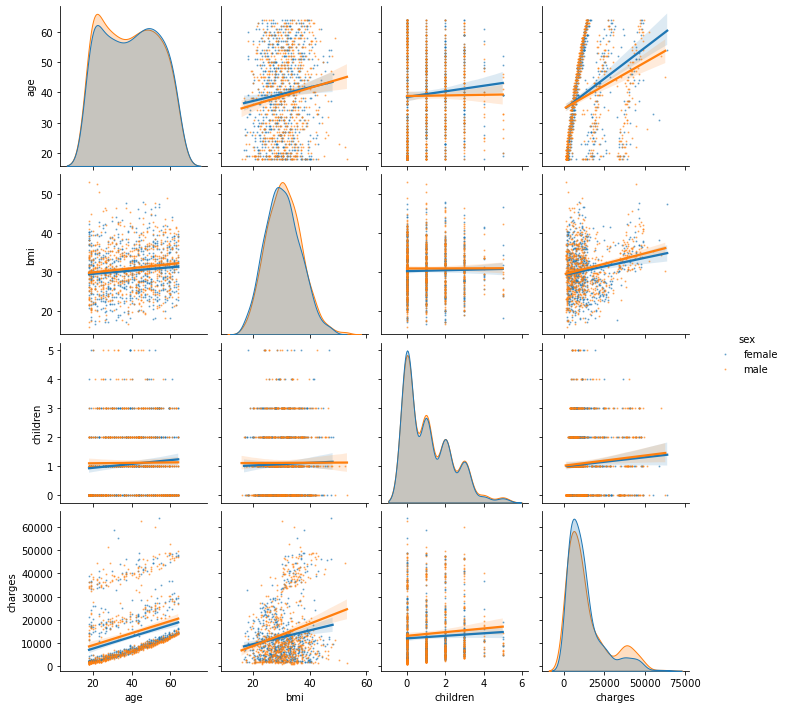

In [95]:
sns.pairplot(ins, kind='reg', hue='sex', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

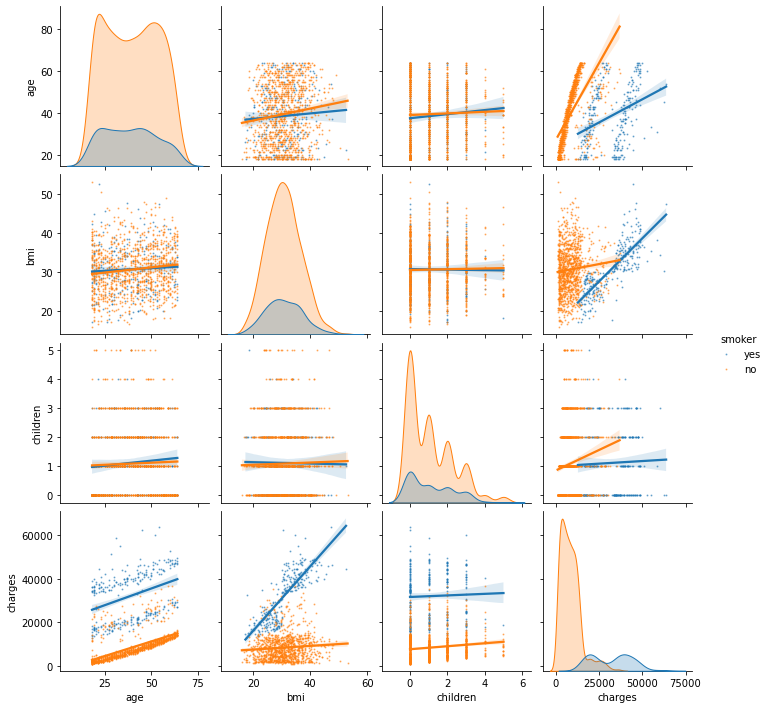

In [96]:
sns.pairplot(ins, kind='reg', hue='smoker', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

In [97]:
ins['bmi30'] = np.where(ins.bmi > 30, 1, 0)

In [98]:
ins

,age,sex,bmi,children,smoker,region,charges,bmi30
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [99]:
data = ins.drop(columns='charges')
X=pd.get_dummies(data, drop_first=True)
y=ins.charges

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train )
lr.score(X_test, y_test)

0.7555212237476235

In [102]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   bmi30     1338 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 78.5+ KB


In [103]:
ins.children=ins.children.astype(str)
ins.sex = np.where(ins.sex == 'male',1,0)
ins.smoker = np.where(ins.smoker == 'yes',1,0)
ins['bmisq'] = ins.bmi **2
ins['bmi30*'] = ins.bmi30 * ins.smoker
ins['bmis1sm'] = ins.bmisq * ins.smoker
ins['bmisex'] = ins.bmi * ins.sex
ins['bmism'] = ins.bmi * ins.smoker

X = pd.get_dummies(ins.drop(columns='charges'), drop_first=True)
y= ins.charges

X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.874078009687614

In [105]:
X_train.mean()

age                  39.300214
sex                   0.522436
bmi                  30.709209
smoker                0.204060
bmi30                 0.527778
bmisq               981.317878
bmi30*                0.105769
bmis1sm             200.657123
bmisex               16.222826
bmism                 6.265636
children_1            0.232906
children_2            0.188034
children_3            0.111111
children_4            0.021368
children_5            0.014957
region_northwest      0.224359
region_southeast      0.287393
region_southwest      0.248932
dtype: float64

In [106]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.fit_transform(X_test)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)
lr1 = LinearRegression()
lr1.fit(X_train_rb, y_train)
lr1.score(X_test_rb, y_test)

0.8707334302274735